 
 ##### Nama  : Muhamad Raihan Syahrin Sya'bani
 ##### NIM   : 1301213257
 ##### Kelas : IF-45-DSIS.01

## Assignment

Import necessary library

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [2]:
import openpyxl
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Drop unnecessary columns

In [4]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [6]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [7]:
### type your answer here
df_china_india = df_can[df_can['Country'].isin(['China', 'India'])]

# Display the filtered dataframe
df_china_india.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [8]:
import matplotlib.pyplot as plt

<Figure size 3000x5000 with 0 Axes>

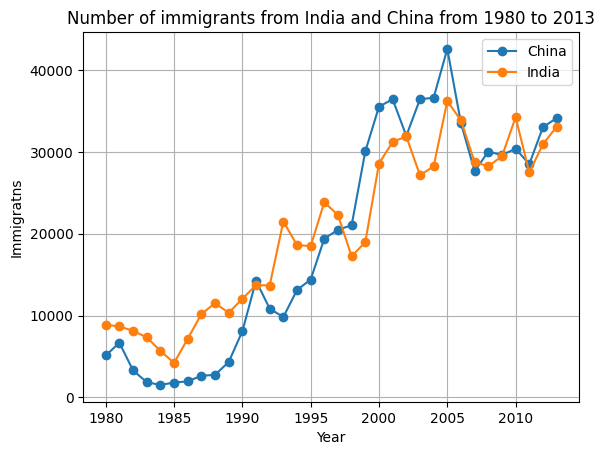

In [9]:
### type your answer here
plt.figure(figsize=(30, 50))
df_china_india.iloc[:,4:-1].T.plot(kind='line', marker='o')

plt.title('Number of immigrants from India and China from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Immigratns')
plt.grid(True)
plt.legend(['China','India'])
plt.show()


**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [10]:
### type your answer here
df_top5countries = df_can.sort_values(by='Total', ascending=False).head(5)
df_top5countries_country = df_can.sort_values(by='Total', ascending=False)['Country'].head(5).values.tolist()
print(df_top5countries_country)
df_top5countries

['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan']


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Step 2: Plot graph

<Figure size 3000x5000 with 0 Axes>

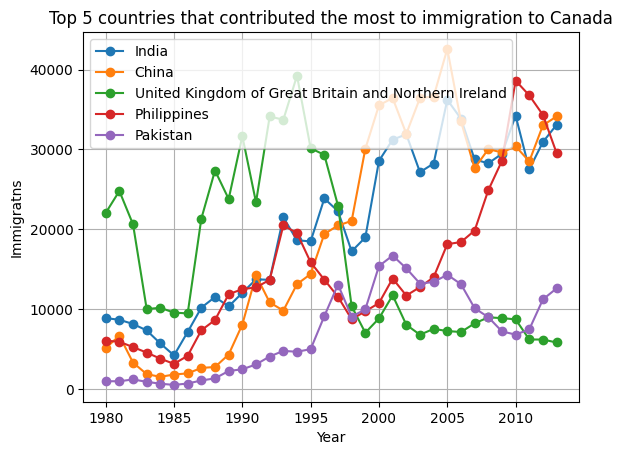

In [11]:
### type your answer here
plt.figure(figsize=(30, 50))
df_top5countries.iloc[:,4:-1].T.plot(kind='line', marker='o')

plt.title('Top 5 countries that contributed the most to immigration to Canada')
plt.xlabel('Year')
plt.ylabel('Immigratns')
plt.grid(True)
plt.legend(df_top5countries_country)
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

<Figure size 3000x5000 with 0 Axes>

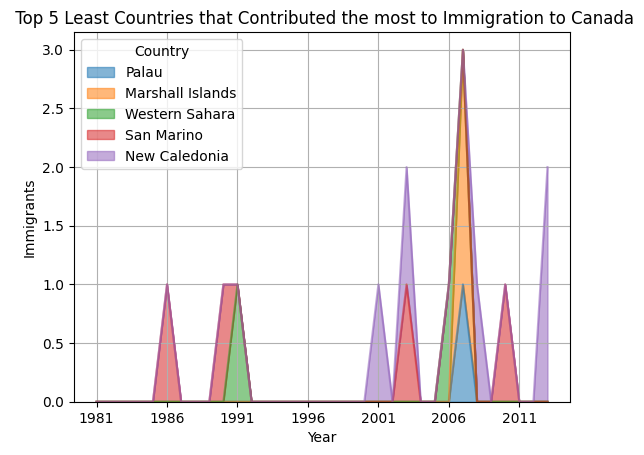

In [12]:
### type your answer here
df_least5countries = df_can.sort_values(by='Total', ascending=True).head(5)
df_least5countries

plt.figure(figsize=(30, 50))
df_least5countries.set_index('Country').iloc[:, 4:-1].T.plot.area(alpha=0.55)

plt.title(' Top 5 Least Countries that Contributed the most to Immigration to Canada')
plt.xlabel('Year')
plt.ylabel('Immigrants')
plt.grid(True)

plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

<Figure size 3000x5000 with 0 Axes>

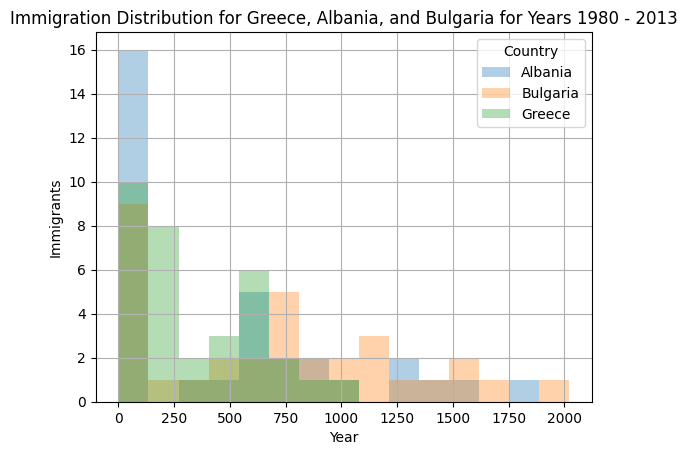

In [13]:
### type your answer here
df_GreeceAlbaniaBulgaria = df_can[df_can['Country'].isin(['Greece', 'Albania','Bulgaria'])]
df_GreeceAlbaniaBulgaria

plt.figure(figsize=(30, 50))
df_GreeceAlbaniaBulgaria.set_index('Country').iloc[:, 4:-1].T.plot.hist(alpha=0.35, bins=15)

plt.title('Immigration Distribution for Greece, Albania, and Bulgaria for Years 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Immigrants')
plt.grid(True)

plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [14]:
### type your answer here
df_top15countries = df_can.sort_values(by='Total', ascending=False).head(15)
df_top15countries

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
185,United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
81,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
162,Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
140,Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
137,Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,...,1405,1263,1235,1267,1013,795,720,779,852,139241


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

<Figure size 2000x3000 with 0 Axes>

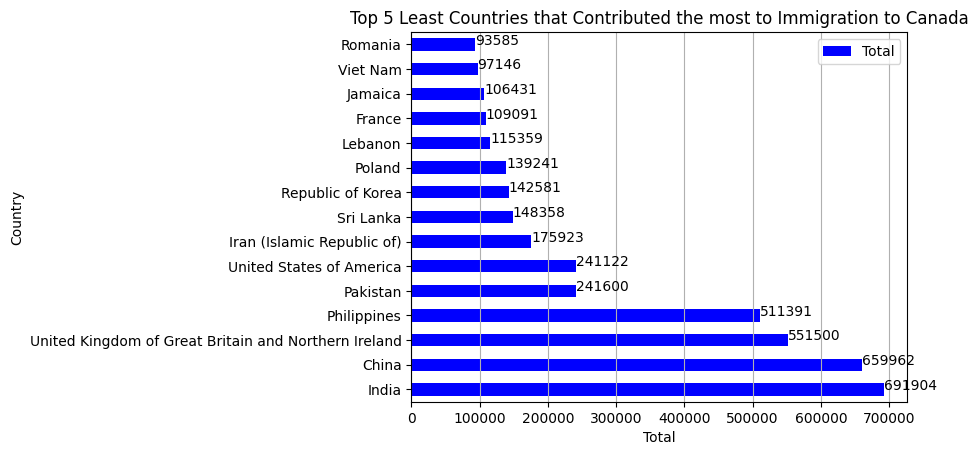

In [15]:
### type your answer here
plt.figure(figsize=(20, 30))
df_top15countries.set_index('Country').iloc[:,-1:].plot(kind='barh',color='blue')

for index, value in enumerate(df_top15countries['Total']):
  plt.text(value, index, str(value))

plt.title('Top 5 Least Countries that Contributed the most to Immigration to Canada')
plt.xlabel('Total')
plt.ylabel('Country')
plt.grid(axis='x')

plt.show()


# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).